<a href="https://colab.research.google.com/github/eng-akash/MachineLearning/blob/main/RedWineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries and data set

In [ ]:
from google.colab import files
uploaded = files.upload()

# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing datasets
df= pd.read_csv('redwinequality.csv')

print(df)

Saving redwinequality.csv to redwinequality (5).csv
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47       

removing outliers

In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_clean = ['fixed acidity',  'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' ,'free sulfur dioxide' , 'total sulfur dioxide'  ,'density' ,   'pH',  'sulphates' ,'alcohol','quality']

cleaned_data = remove_outliers_iqr(df.copy(), columns_to_clean)
print(cleaned_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


x=df[['fixed acidity',  'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' ,'free sulfur dioxide' , 'total sulfur dioxide'  ,'density' ,   'pH',  'sulphates','alcohol']]
y=df[['quality']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.39002514396395416
R-squared: 0.4031803412796231


In [ ]:
# Reshape if necessary
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Create the DataFrame
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
print(df1)

    Actual  Predicted
0        6   5.346664
1        5   5.056313
2        6   5.664470
3        5   5.464515
4        6   5.725185
5        5   5.279287
6        5   5.034217
7        5   5.126233
8        5   5.745343
9        6   5.686650
10       7   6.139597
11       3   5.233869
12       5   5.549915
13       5   5.258253
14       6   5.448105
15       7   6.468290
16       5   5.150181
17       7   5.591052
18       8   6.556066
19       5   5.322558
20       5   5.391839
21       6   5.196108
22       5   5.944757
23       6   6.361976
24       6   5.354849


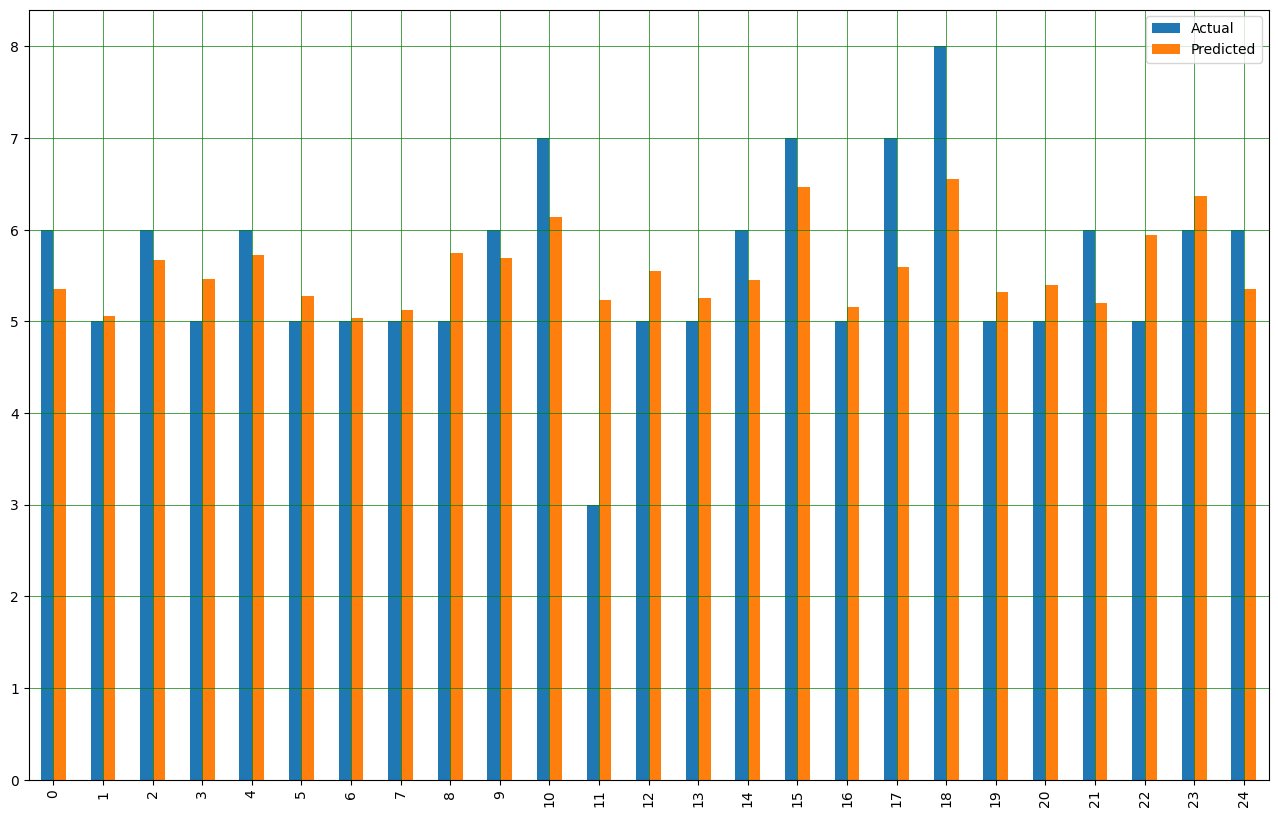

In [ ]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, for example :

Need more data: We need to have a huge amount of data to get the best possible prediction.

Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.